# Ecuación de movimiento del péndulo simple

Un péndulo simple consiste de un cuerpo de masa m atado al extremo de una cuerda inextensible de masa despreciable fija en el otro extremo oscilando en un plano.

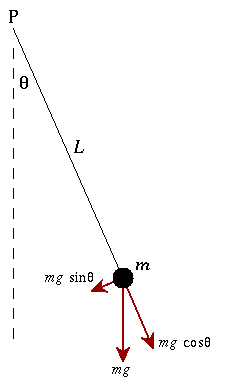

La ecuación de movimiento es (en el caso en que $\theta$ es pequeño):

$$ \frac{d^2\theta}{dt^2} + \frac{g}{L}\theta = 0, $$

y su solución es:

$$ \theta(t) = \theta_0\cos(\omega t).$$

### 1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran.    

Método numérico para resolver la ED.
RK, Euler

El primer inciso del problema es escribir un código en python para resolver la ecuación de movimiento pero sin usar métodos vectoriales (numpy). Usaré el método numérico de Euler que se puede resumir como:

$$ y_{n+1} = y_{n} + mh\ ,$$
    
donde $m$ es la pendiente estimada y $h$ es el tamaño del paso en cada iteración. Primero tenemos que re-escribir la ecuación de movimiento como un sistema de ecuaciones:

$$ \phi = \frac{d\theta}{dt} $$

$$ \frac{d\phi}{dt}+ \frac{g}{l}\theta $$  

In [2]:
# Parameters definitions.
from math import pi, sqrt, cos

g = 9.8 # g = acceleration due gravity force [m/s**2]
l = 0.3   # l = lenght of the rope [m]
omega = sqrt(g/l) # omega = angular frequency [rad/s]
T = 2*pi/omega # T = period [1/s]

In [72]:
# Euler's numerical method implementation.
steps = 10000 # Number of iterations.
theta_0 = 8.73e-2 # initial displacement = [rads]
Dtheta_t0 = 0.1 # initial angular velocity = [rad/s], we choose it unequal to zero because otherwise can be problematic.
h = 4*T/steps # step size

phi = Dtheta_t0 # phi_0
theta = theta_0 # initial value

file = open("solution.csv","w") # the results will be stored in a file, old school way
file.write("time,theta,theta_real\n")

for i in range(0,steps):    
    t = i*h # time will increase in h size steps
    phi_old = phi # value holder, because we need to actualize phi and theta simultaneusly
    theta_old = theta # value holder
    theta = theta_old + h*phi_old # theta actualization 
    theta_real = theta_0*cos(omega*t) # theta's real value (using analytic solution) computation for further comparison
    phi = phi_old + h*(-g/l)*theta_old # phi actualization
    file.write("%f,%f,%f\n"%(t,theta,theta_real)) # saving the result in the file
    
file.close() # finishing numerical method

Finalizada la implementación del método numérico ahora visualizaremos el resultado gráficamente. Usualmente en un programa de C se visualizaría usando un programa externo. Aquí lo visualizaré usando matplotlib y también pandas en la sección 3.

### 2.- Reescriendo el código anterior aprovechando el manejo de arreglos de numpy (vectorizar código). 

In [81]:
# contemporary approach to the problem
import numpy as np 

t = np.linspace(0,4*T,10000) #creating an array
theta_real = theta_0*np.cos(omega*t) 
theta = np.zeros(10000,dtype='float')
theta[0]=theta_0
phi = np.zeros(10000,dtype='float')
phi[0]=Dtheta_t0

for i in range(1,t.size):        
    theta[i] = theta[i-1] + h*phi[i-1] # theta actualization 
    phi[i] = phi[i-1] + h*(-g/l)*theta[i-1] # phi actualization

### 3.- Comparando resultados (usar tablas y gráficos) en terminos de los tiempos de ejecución. 

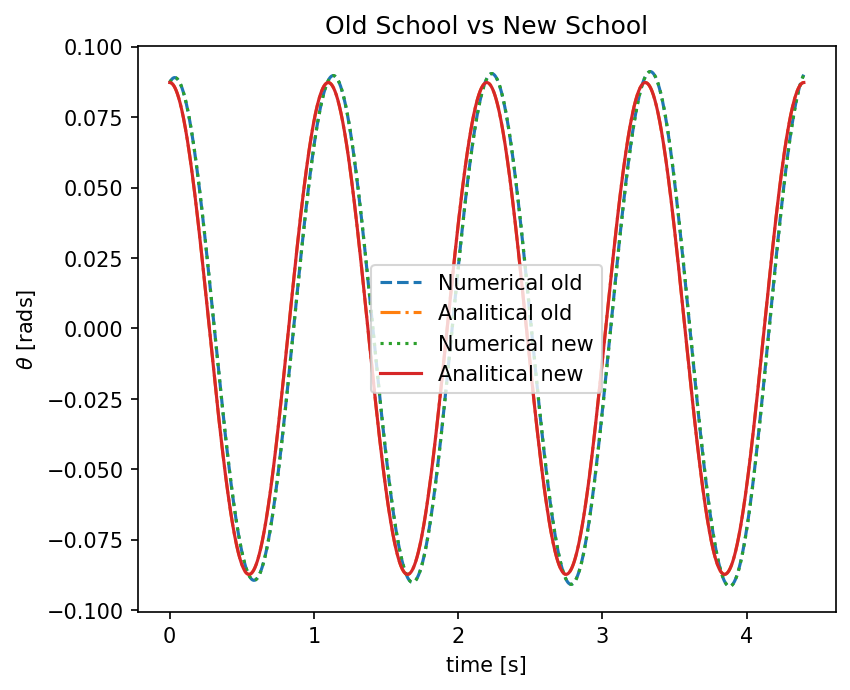

In [89]:
from matplotlib import pyplot as plt
from pandas import read_table

sol = read_table('solution.csv',sep=',')

t_vals = sol['time'].values
theta_vals = sol['theta'].values
theta_real_values = sol['theta_real'].values

sol_figure = plt.figure(figsize=[3*2,2.5*2],dpi=150)
plt.plot(t_vals,theta_vals,'--',label='Numerical old')
plt.plot(t_vals,theta_real_values,'-.',label='Analitical old')
plt.plot(t,theta,':',label='Numerical new')
plt.plot(t,theta_real,label='Analitical new')
plt.legend()
plt.ylabel("$\\theta$ [rads]")
plt.xlabel("time [s]")
plt.title("Old School vs New School")
sol_figure.savefig('figure1.png')